<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9902548	total: 68.2ms	remaining: 1m 8s


1:	learn: 0.9689899	total: 72.6ms	remaining: 36.2s
2:	learn: 0.9475538	total: 75.2ms	remaining: 25s
3:	learn: 0.9326689	total: 77.7ms	remaining: 19.4s
4:	learn: 0.9138639	total: 80.2ms	remaining: 16s
5:	learn: 0.8961020	total: 82.3ms	remaining: 13.6s
6:	learn: 0.8788464	total: 83.9ms	remaining: 11.9s
7:	learn: 0.8620128	total: 86.3ms	remaining: 10.7s
8:	learn: 0.8461952	total: 88.5ms	remaining: 9.75s
9:	learn: 0.8291911	total: 90.8ms	remaining: 8.99s
10:	learn: 0.8159149	total: 93.2ms	remaining: 8.38s
11:	learn: 0.7999757	total: 95.4ms	remaining: 7.85s
12:	learn: 0.7845564	total: 97.6ms	remaining: 7.41s
13:	learn: 0.7691229	total: 100ms	remaining: 7.05s
14:	learn: 0.7564772	total: 102ms	remaining: 6.67s
15:	learn: 0.7427366	total: 103ms	remaining: 6.34s
16:	learn: 0.7292888	total: 106ms	remaining: 6.11s
17:	learn: 0.7158865	total: 108ms	remaining: 5.89s
18:	learn: 0.7037993	total: 110ms	remaining: 5.68s
19:	learn: 0.6922506	total: 112ms	remaining: 5.5s
20:	learn: 0.6780952	total: 114ms

42:	learn: 0.4908287	total: 167ms	remaining: 3.71s
43:	learn: 0.4854489	total: 169ms	remaining: 3.68s
44:	learn: 0.4805893	total: 173ms	remaining: 3.66s
45:	learn: 0.4735979	total: 175ms	remaining: 3.63s
46:	learn: 0.4679220	total: 177ms	remaining: 3.59s
47:	learn: 0.4615423	total: 179ms	remaining: 3.55s
48:	learn: 0.4575969	total: 181ms	remaining: 3.52s
49:	learn: 0.4533967	total: 184ms	remaining: 3.49s
50:	learn: 0.4481831	total: 186ms	remaining: 3.47s
51:	learn: 0.4440915	total: 189ms	remaining: 3.44s
52:	learn: 0.4394471	total: 191ms	remaining: 3.42s
53:	learn: 0.4363199	total: 193ms	remaining: 3.38s
54:	learn: 0.4317228	total: 195ms	remaining: 3.35s
55:	learn: 0.4278226	total: 197ms	remaining: 3.32s
56:	learn: 0.4245632	total: 199ms	remaining: 3.29s
57:	learn: 0.4205739	total: 202ms	remaining: 3.27s
58:	learn: 0.4169003	total: 204ms	remaining: 3.25s
59:	learn: 0.4127741	total: 206ms	remaining: 3.23s
60:	learn: 0.4089408	total: 208ms	remaining: 3.21s
61:	learn: 0.4049034	total: 215

64:	learn: 0.3954018	total: 234ms	remaining: 3.36s
65:	learn: 0.3921300	total: 236ms	remaining: 3.34s
66:	learn: 0.3884747	total: 238ms	remaining: 3.31s
67:	learn: 0.3843986	total: 240ms	remaining: 3.29s
68:	learn: 0.3819221	total: 243ms	remaining: 3.28s
69:	learn: 0.3792325	total: 246ms	remaining: 3.26s
70:	learn: 0.3749374	total: 248ms	remaining: 3.24s
71:	learn: 0.3720910	total: 251ms	remaining: 3.23s
72:	learn: 0.3700167	total: 253ms	remaining: 3.21s
73:	learn: 0.3661850	total: 255ms	remaining: 3.2s
74:	learn: 0.3631645	total: 258ms	remaining: 3.18s
75:	learn: 0.3608409	total: 260ms	remaining: 3.16s
76:	learn: 0.3581881	total: 264ms	remaining: 3.17s
77:	learn: 0.3546981	total: 266ms	remaining: 3.15s
78:	learn: 0.3520743	total: 268ms	remaining: 3.13s
79:	learn: 0.3496519	total: 270ms	remaining: 3.1s
80:	learn: 0.3473800	total: 272ms	remaining: 3.08s
81:	learn: 0.3454833	total: 273ms	remaining: 3.06s
82:	learn: 0.3439644	total: 275ms	remaining: 3.03s
83:	learn: 0.3416416	total: 276ms

95:	learn: 0.3169534	total: 307ms	remaining: 2.89s
96:	learn: 0.3150438	total: 312ms	remaining: 2.9s
97:	learn: 0.3134086	total: 316ms	remaining: 2.91s
98:	learn: 0.3117620	total: 318ms	remaining: 2.89s
99:	learn: 0.3102929	total: 320ms	remaining: 2.88s
100:	learn: 0.3084321	total: 323ms	remaining: 2.87s
101:	learn: 0.3063932	total: 325ms	remaining: 2.86s
102:	learn: 0.3049842	total: 327ms	remaining: 2.85s
103:	learn: 0.3033598	total: 329ms	remaining: 2.84s
104:	learn: 0.3016290	total: 332ms	remaining: 2.83s
105:	learn: 0.3006414	total: 334ms	remaining: 2.81s
106:	learn: 0.2991961	total: 337ms	remaining: 2.81s
107:	learn: 0.2970675	total: 339ms	remaining: 2.8s
108:	learn: 0.2953852	total: 341ms	remaining: 2.79s
109:	learn: 0.2938641	total: 344ms	remaining: 2.78s
110:	learn: 0.2925311	total: 346ms	remaining: 2.77s
111:	learn: 0.2912992	total: 352ms	remaining: 2.79s
112:	learn: 0.2898074	total: 356ms	remaining: 2.79s
113:	learn: 0.2881588	total: 358ms	remaining: 2.78s
114:	learn: 0.28687

119:	learn: 0.2809899	total: 373ms	remaining: 2.73s
120:	learn: 0.2797397	total: 377ms	remaining: 2.74s
121:	learn: 0.2791512	total: 381ms	remaining: 2.74s
122:	learn: 0.2775360	total: 385ms	remaining: 2.74s
123:	learn: 0.2768148	total: 388ms	remaining: 2.74s
124:	learn: 0.2756629	total: 394ms	remaining: 2.75s
125:	learn: 0.2745275	total: 396ms	remaining: 2.75s
126:	learn: 0.2733873	total: 398ms	remaining: 2.74s
127:	learn: 0.2725623	total: 402ms	remaining: 2.74s
128:	learn: 0.2714016	total: 406ms	remaining: 2.74s
129:	learn: 0.2702348	total: 409ms	remaining: 2.74s
130:	learn: 0.2693263	total: 413ms	remaining: 2.74s
131:	learn: 0.2680494	total: 415ms	remaining: 2.73s
132:	learn: 0.2671437	total: 417ms	remaining: 2.72s
133:	learn: 0.2664166	total: 419ms	remaining: 2.71s
134:	learn: 0.2655163	total: 421ms	remaining: 2.7s
135:	learn: 0.2645141	total: 424ms	remaining: 2.69s
136:	learn: 0.2631318	total: 426ms	remaining: 2.69s
137:	learn: 0.2624084	total: 429ms	remaining: 2.68s
138:	learn: 0

143:	learn: 0.2567651	total: 444ms	remaining: 2.64s
144:	learn: 0.2558512	total: 449ms	remaining: 2.65s
145:	learn: 0.2547456	total: 451ms	remaining: 2.64s
146:	learn: 0.2538506	total: 454ms	remaining: 2.63s
147:	learn: 0.2528159	total: 456ms	remaining: 2.63s
148:	learn: 0.2520638	total: 458ms	remaining: 2.62s
149:	learn: 0.2513144	total: 462ms	remaining: 2.62s
150:	learn: 0.2501450	total: 464ms	remaining: 2.61s
151:	learn: 0.2491263	total: 466ms	remaining: 2.6s
152:	learn: 0.2478073	total: 469ms	remaining: 2.59s
153:	learn: 0.2470330	total: 471ms	remaining: 2.59s
154:	learn: 0.2459180	total: 473ms	remaining: 2.58s
155:	learn: 0.2449800	total: 475ms	remaining: 2.57s
156:	learn: 0.2443198	total: 478ms	remaining: 2.56s
157:	learn: 0.2435461	total: 480ms	remaining: 2.56s
158:	learn: 0.2428982	total: 485ms	remaining: 2.56s
159:	learn: 0.2423593	total: 487ms	remaining: 2.56s
160:	learn: 0.2417902	total: 490ms	remaining: 2.55s
161:	learn: 0.2411215	total: 492ms	remaining: 2.55s
162:	learn: 0

168:	learn: 0.2364592	total: 514ms	remaining: 2.53s
169:	learn: 0.2354576	total: 519ms	remaining: 2.53s
170:	learn: 0.2349394	total: 543ms	remaining: 2.63s
171:	learn: 0.2340858	total: 545ms	remaining: 2.62s
172:	learn: 0.2334100	total: 547ms	remaining: 2.62s
173:	learn: 0.2326581	total: 550ms	remaining: 2.61s
174:	learn: 0.2318024	total: 552ms	remaining: 2.6s
175:	learn: 0.2311357	total: 555ms	remaining: 2.6s
176:	learn: 0.2303104	total: 560ms	remaining: 2.6s
177:	learn: 0.2294554	total: 564ms	remaining: 2.6s
178:	learn: 0.2292416	total: 574ms	remaining: 2.63s
179:	learn: 0.2285633	total: 576ms	remaining: 2.63s
180:	learn: 0.2279340	total: 579ms	remaining: 2.62s
181:	learn: 0.2271853	total: 581ms	remaining: 2.61s
182:	learn: 0.2265210	total: 584ms	remaining: 2.6s
183:	learn: 0.2256474	total: 586ms	remaining: 2.6s
184:	learn: 0.2250594	total: 588ms	remaining: 2.59s
185:	learn: 0.2242158	total: 591ms	remaining: 2.59s
186:	learn: 0.2235965	total: 594ms	remaining: 2.58s


187:	learn: 0.2229174	total: 623ms	remaining: 2.69s
188:	learn: 0.2223117	total: 626ms	remaining: 2.69s
189:	learn: 0.2219678	total: 629ms	remaining: 2.68s
190:	learn: 0.2213197	total: 631ms	remaining: 2.67s
191:	learn: 0.2207968	total: 633ms	remaining: 2.67s
192:	learn: 0.2202509	total: 636ms	remaining: 2.66s
193:	learn: 0.2194369	total: 638ms	remaining: 2.65s
194:	learn: 0.2188741	total: 645ms	remaining: 2.66s
195:	learn: 0.2182774	total: 651ms	remaining: 2.67s
196:	learn: 0.2178036	total: 654ms	remaining: 2.67s
197:	learn: 0.2171023	total: 657ms	remaining: 2.66s
198:	learn: 0.2165626	total: 659ms	remaining: 2.65s
199:	learn: 0.2158722	total: 662ms	remaining: 2.65s
200:	learn: 0.2153750	total: 664ms	remaining: 2.64s
201:	learn: 0.2150264	total: 667ms	remaining: 2.63s
202:	learn: 0.2145277	total: 669ms	remaining: 2.63s
203:	learn: 0.2137959	total: 672ms	remaining: 2.62s
204:	learn: 0.2131379	total: 673ms	remaining: 2.61s
205:	learn: 0.2126697	total: 675ms	remaining: 2.6s
206:	learn: 0

208:	learn: 0.2108304	total: 698ms	remaining: 2.64s
209:	learn: 0.2103690	total: 702ms	remaining: 2.64s
210:	learn: 0.2097930	total: 705ms	remaining: 2.63s
211:	learn: 0.2093221	total: 707ms	remaining: 2.63s
212:	learn: 0.2090556	total: 710ms	remaining: 2.62s
213:	learn: 0.2083872	total: 712ms	remaining: 2.61s
214:	learn: 0.2079681	total: 714ms	remaining: 2.61s
215:	learn: 0.2073470	total: 717ms	remaining: 2.6s
216:	learn: 0.2069011	total: 719ms	remaining: 2.59s
217:	learn: 0.2064081	total: 724ms	remaining: 2.6s
218:	learn: 0.2059084	total: 728ms	remaining: 2.6s
219:	learn: 0.2053123	total: 733ms	remaining: 2.6s
220:	learn: 0.2047321	total: 737ms	remaining: 2.6s
221:	learn: 0.2044015	total: 741ms	remaining: 2.6s
222:	learn: 0.2038632	total: 744ms	remaining: 2.59s
223:	learn: 0.2035293	total: 746ms	remaining: 2.58s
224:	learn: 0.2030481	total: 748ms	remaining: 2.58s
225:	learn: 0.2024402	total: 750ms	remaining: 2.57s
226:	learn: 0.2017483	total: 754ms	remaining: 2.57s
227:	learn: 0.2012

229:	learn: 0.2001959	total: 846ms	remaining: 2.83s
230:	learn: 0.1996122	total: 853ms	remaining: 2.84s
231:	learn: 0.1990747	total: 856ms	remaining: 2.83s
232:	learn: 0.1988062	total: 859ms	remaining: 2.83s
233:	learn: 0.1982568	total: 862ms	remaining: 2.82s
234:	learn: 0.1978251	total: 865ms	remaining: 2.82s
235:	learn: 0.1975605	total: 869ms	remaining: 2.81s


236:	learn: 0.1969517	total: 896ms	remaining: 2.88s
237:	learn: 0.1966515	total: 898ms	remaining: 2.88s
238:	learn: 0.1963453	total: 901ms	remaining: 2.87s
239:	learn: 0.1958904	total: 904ms	remaining: 2.86s
240:	learn: 0.1954229	total: 906ms	remaining: 2.85s
241:	learn: 0.1949869	total: 910ms	remaining: 2.85s
242:	learn: 0.1943082	total: 914ms	remaining: 2.85s
243:	learn: 0.1939483	total: 917ms	remaining: 2.84s
244:	learn: 0.1935484	total: 922ms	remaining: 2.84s
245:	learn: 0.1931399	total: 924ms	remaining: 2.83s
246:	learn: 0.1924859	total: 926ms	remaining: 2.82s
247:	learn: 0.1919848	total: 929ms	remaining: 2.81s
248:	learn: 0.1916532	total: 931ms	remaining: 2.81s
249:	learn: 0.1908246	total: 934ms	remaining: 2.8s
250:	learn: 0.1903217	total: 938ms	remaining: 2.8s
251:	learn: 0.1898162	total: 941ms	remaining: 2.79s
252:	learn: 0.1891554	total: 950ms	remaining: 2.8s


253:	learn: 0.1885841	total: 953ms	remaining: 2.8s
254:	learn: 0.1881706	total: 956ms	remaining: 2.79s
255:	learn: 0.1877690	total: 961ms	remaining: 2.79s
256:	learn: 0.1871974	total: 965ms	remaining: 2.79s
257:	learn: 0.1868634	total: 968ms	remaining: 2.79s
258:	learn: 0.1862592	total: 971ms	remaining: 2.78s
259:	learn: 0.1858115	total: 974ms	remaining: 2.77s
260:	learn: 0.1855951	total: 976ms	remaining: 2.76s
261:	learn: 0.1851526	total: 979ms	remaining: 2.76s
262:	learn: 0.1845614	total: 981ms	remaining: 2.75s
263:	learn: 0.1839441	total: 982ms	remaining: 2.74s
264:	learn: 0.1834369	total: 984ms	remaining: 2.73s


265:	learn: 0.1827643	total: 986ms	remaining: 2.72s
266:	learn: 0.1823236	total: 989ms	remaining: 2.71s
267:	learn: 0.1819307	total: 990ms	remaining: 2.7s
268:	learn: 0.1814801	total: 992ms	remaining: 2.69s
269:	learn: 0.1809183	total: 995ms	remaining: 2.69s
270:	learn: 0.1803628	total: 998ms	remaining: 2.68s
271:	learn: 0.1801757	total: 1.02s	remaining: 2.72s
272:	learn: 0.1796901	total: 1.03s	remaining: 2.74s
273:	learn: 0.1792647	total: 1.03s	remaining: 2.74s
274:	learn: 0.1788802	total: 1.04s	remaining: 2.73s
275:	learn: 0.1784989	total: 1.04s	remaining: 2.73s
276:	learn: 0.1780498	total: 1.05s	remaining: 2.73s
277:	learn: 0.1777170	total: 1.05s	remaining: 2.73s
278:	learn: 0.1771846	total: 1.05s	remaining: 2.73s
279:	learn: 0.1767398	total: 1.06s	remaining: 2.72s
280:	learn: 0.1763820	total: 1.06s	remaining: 2.71s
281:	learn: 0.1757795	total: 1.06s	remaining: 2.7s
282:	learn: 0.1754058	total: 1.07s	remaining: 2.7s
283:	learn: 0.1748434	total: 1.07s	remaining: 2.7s
284:	learn: 0.17

296:	learn: 0.1696670	total: 1.11s	remaining: 2.62s
297:	learn: 0.1694098	total: 1.12s	remaining: 2.63s
298:	learn: 0.1689881	total: 1.12s	remaining: 2.62s
299:	learn: 0.1685632	total: 1.12s	remaining: 2.62s
300:	learn: 0.1680899	total: 1.12s	remaining: 2.61s
301:	learn: 0.1678382	total: 1.13s	remaining: 2.6s
302:	learn: 0.1674070	total: 1.13s	remaining: 2.6s
303:	learn: 0.1669183	total: 1.13s	remaining: 2.59s
304:	learn: 0.1666790	total: 1.13s	remaining: 2.58s
305:	learn: 0.1663344	total: 1.14s	remaining: 2.58s


306:	learn: 0.1658709	total: 1.14s	remaining: 2.57s
307:	learn: 0.1654435	total: 1.14s	remaining: 2.56s
308:	learn: 0.1652333	total: 1.14s	remaining: 2.56s
309:	learn: 0.1651449	total: 1.15s	remaining: 2.55s
310:	learn: 0.1646561	total: 1.15s	remaining: 2.54s
311:	learn: 0.1642678	total: 1.15s	remaining: 2.54s
312:	learn: 0.1638329	total: 1.17s	remaining: 2.56s
313:	learn: 0.1637444	total: 1.17s	remaining: 2.56s
314:	learn: 0.1634160	total: 1.18s	remaining: 2.56s
315:	learn: 0.1633176	total: 1.18s	remaining: 2.55s
316:	learn: 0.1628227	total: 1.18s	remaining: 2.54s
317:	learn: 0.1623697	total: 1.18s	remaining: 2.54s
318:	learn: 0.1620278	total: 1.19s	remaining: 2.53s
319:	learn: 0.1616341	total: 1.19s	remaining: 2.53s
320:	learn: 0.1612701	total: 1.19s	remaining: 2.52s
321:	learn: 0.1608411	total: 1.19s	remaining: 2.52s
322:	learn: 0.1606654	total: 1.2s	remaining: 2.51s
323:	learn: 0.1602955	total: 1.22s	remaining: 2.54s
324:	learn: 0.1599387	total: 1.22s	remaining: 2.53s
325:	learn: 0

342:	learn: 0.1535430	total: 1.29s	remaining: 2.46s
343:	learn: 0.1530045	total: 1.29s	remaining: 2.46s
344:	learn: 0.1527178	total: 1.29s	remaining: 2.45s
345:	learn: 0.1524391	total: 1.29s	remaining: 2.45s
346:	learn: 0.1522346	total: 1.3s	remaining: 2.44s
347:	learn: 0.1521333	total: 1.3s	remaining: 2.43s
348:	learn: 0.1517119	total: 1.3s	remaining: 2.43s


349:	learn: 0.1513052	total: 1.3s	remaining: 2.42s
350:	learn: 0.1508322	total: 1.31s	remaining: 2.42s
351:	learn: 0.1507673	total: 1.31s	remaining: 2.42s
352:	learn: 0.1503886	total: 1.33s	remaining: 2.44s
353:	learn: 0.1500831	total: 1.34s	remaining: 2.44s
354:	learn: 0.1495523	total: 1.34s	remaining: 2.43s
355:	learn: 0.1491300	total: 1.34s	remaining: 2.42s
356:	learn: 0.1488061	total: 1.34s	remaining: 2.42s
357:	learn: 0.1484846	total: 1.34s	remaining: 2.41s
358:	learn: 0.1481907	total: 1.35s	remaining: 2.41s
359:	learn: 0.1478559	total: 1.35s	remaining: 2.4s
360:	learn: 0.1475501	total: 1.35s	remaining: 2.4s
361:	learn: 0.1470988	total: 1.36s	remaining: 2.39s
362:	learn: 0.1467885	total: 1.37s	remaining: 2.41s
363:	learn: 0.1467210	total: 1.37s	remaining: 2.4s
364:	learn: 0.1465401	total: 1.38s	remaining: 2.4s
365:	learn: 0.1461546	total: 1.38s	remaining: 2.39s
366:	learn: 0.1456698	total: 1.38s	remaining: 2.38s
367:	learn: 0.1454952	total: 1.38s	remaining: 2.38s
368:	learn: 0.145

387:	learn: 0.1398394	total: 1.46s	remaining: 2.3s
388:	learn: 0.1393185	total: 1.46s	remaining: 2.29s
389:	learn: 0.1392699	total: 1.46s	remaining: 2.29s
390:	learn: 0.1390428	total: 1.47s	remaining: 2.28s
391:	learn: 0.1386794	total: 1.47s	remaining: 2.28s
392:	learn: 0.1383870	total: 1.47s	remaining: 2.27s
393:	learn: 0.1381133	total: 1.47s	remaining: 2.26s


394:	learn: 0.1378876	total: 1.48s	remaining: 2.26s
395:	learn: 0.1375105	total: 1.48s	remaining: 2.25s
396:	learn: 0.1372310	total: 1.49s	remaining: 2.26s
397:	learn: 0.1369644	total: 1.5s	remaining: 2.27s
398:	learn: 0.1366417	total: 1.5s	remaining: 2.26s
399:	learn: 0.1363261	total: 1.5s	remaining: 2.26s
400:	learn: 0.1359378	total: 1.51s	remaining: 2.25s
401:	learn: 0.1356661	total: 1.51s	remaining: 2.25s
402:	learn: 0.1354083	total: 1.51s	remaining: 2.24s
403:	learn: 0.1351816	total: 1.51s	remaining: 2.23s
404:	learn: 0.1348274	total: 1.52s	remaining: 2.23s
405:	learn: 0.1346053	total: 1.52s	remaining: 2.22s
406:	learn: 0.1342080	total: 1.52s	remaining: 2.22s
407:	learn: 0.1337768	total: 1.53s	remaining: 2.22s
408:	learn: 0.1334908	total: 1.53s	remaining: 2.21s
409:	learn: 0.1333066	total: 1.54s	remaining: 2.21s
410:	learn: 0.1330240	total: 1.55s	remaining: 2.22s
411:	learn: 0.1329724	total: 1.55s	remaining: 2.21s
412:	learn: 0.1326362	total: 1.55s	remaining: 2.21s
413:	learn: 0.1

438:	learn: 0.1269436	total: 1.62s	remaining: 2.07s
439:	learn: 0.1265889	total: 1.62s	remaining: 2.07s
440:	learn: 0.1265376	total: 1.63s	remaining: 2.06s
441:	learn: 0.1263257	total: 1.63s	remaining: 2.06s
442:	learn: 0.1261683	total: 1.63s	remaining: 2.05s
443:	learn: 0.1258953	total: 1.63s	remaining: 2.05s
444:	learn: 0.1257233	total: 1.64s	remaining: 2.04s
445:	learn: 0.1253911	total: 1.64s	remaining: 2.04s


446:	learn: 0.1253742	total: 1.64s	remaining: 2.03s
447:	learn: 0.1251105	total: 1.65s	remaining: 2.03s
448:	learn: 0.1248431	total: 1.65s	remaining: 2.02s
449:	learn: 0.1244899	total: 1.65s	remaining: 2.02s
450:	learn: 0.1241991	total: 1.66s	remaining: 2.01s
451:	learn: 0.1239098	total: 1.66s	remaining: 2.01s
452:	learn: 0.1235372	total: 1.66s	remaining: 2s
453:	learn: 0.1232227	total: 1.66s	remaining: 2s
454:	learn: 0.1229307	total: 1.66s	remaining: 1.99s
455:	learn: 0.1226879	total: 1.67s	remaining: 1.99s
456:	learn: 0.1226427	total: 1.67s	remaining: 1.98s
457:	learn: 0.1226083	total: 1.67s	remaining: 1.98s
458:	learn: 0.1224420	total: 1.67s	remaining: 1.97s
459:	learn: 0.1223317	total: 1.68s	remaining: 1.97s
460:	learn: 0.1219911	total: 1.68s	remaining: 1.96s
461:	learn: 0.1217815	total: 1.68s	remaining: 1.96s
462:	learn: 0.1216709	total: 1.68s	remaining: 1.95s
463:	learn: 0.1214764	total: 1.69s	remaining: 1.95s
464:	learn: 0.1211864	total: 1.69s	remaining: 1.94s
465:	learn: 0.1211

510:	learn: 0.1110863	total: 1.79s	remaining: 1.72s
511:	learn: 0.1109151	total: 1.8s	remaining: 1.71s
512:	learn: 0.1106817	total: 1.8s	remaining: 1.71s
513:	learn: 0.1104649	total: 1.8s	remaining: 1.7s
514:	learn: 0.1100997	total: 1.8s	remaining: 1.7s
515:	learn: 0.1098913	total: 1.8s	remaining: 1.69s
516:	learn: 0.1096566	total: 1.81s	remaining: 1.69s
517:	learn: 0.1095624	total: 1.81s	remaining: 1.68s
518:	learn: 0.1092840	total: 1.81s	remaining: 1.68s
519:	learn: 0.1090868	total: 1.82s	remaining: 1.68s
520:	learn: 0.1088747	total: 1.82s	remaining: 1.67s


521:	learn: 0.1085978	total: 1.82s	remaining: 1.67s
522:	learn: 0.1082956	total: 1.82s	remaining: 1.66s
523:	learn: 0.1082262	total: 1.83s	remaining: 1.66s
524:	learn: 0.1080219	total: 1.83s	remaining: 1.65s
525:	learn: 0.1077957	total: 1.83s	remaining: 1.65s
526:	learn: 0.1076580	total: 1.83s	remaining: 1.65s
527:	learn: 0.1075615	total: 1.83s	remaining: 1.64s
528:	learn: 0.1073225	total: 1.84s	remaining: 1.64s
529:	learn: 0.1071618	total: 1.84s	remaining: 1.63s
530:	learn: 0.1070398	total: 1.84s	remaining: 1.63s
531:	learn: 0.1068022	total: 1.84s	remaining: 1.62s
532:	learn: 0.1065437	total: 1.85s	remaining: 1.62s
533:	learn: 0.1062483	total: 1.85s	remaining: 1.61s
534:	learn: 0.1060074	total: 1.85s	remaining: 1.61s
535:	learn: 0.1058024	total: 1.86s	remaining: 1.61s
536:	learn: 0.1056227	total: 1.86s	remaining: 1.6s
537:	learn: 0.1054568	total: 1.86s	remaining: 1.6s
538:	learn: 0.1052534	total: 1.86s	remaining: 1.59s
539:	learn: 0.1050014	total: 1.87s	remaining: 1.59s
540:	learn: 0.

588:	learn: 0.0966795	total: 1.97s	remaining: 1.38s
589:	learn: 0.0965412	total: 1.97s	remaining: 1.37s
590:	learn: 0.0963229	total: 1.98s	remaining: 1.37s
591:	learn: 0.0961688	total: 1.98s	remaining: 1.36s
592:	learn: 0.0959226	total: 1.98s	remaining: 1.36s
593:	learn: 0.0956886	total: 1.98s	remaining: 1.35s
594:	learn: 0.0955385	total: 1.99s	remaining: 1.35s
595:	learn: 0.0953989	total: 1.99s	remaining: 1.35s
596:	learn: 0.0952357	total: 1.99s	remaining: 1.34s
597:	learn: 0.0950493	total: 1.99s	remaining: 1.34s
598:	learn: 0.0948539	total: 2s	remaining: 1.34s
599:	learn: 0.0947425	total: 2s	remaining: 1.33s


600:	learn: 0.0945100	total: 2s	remaining: 1.33s
601:	learn: 0.0943142	total: 2s	remaining: 1.32s
602:	learn: 0.0941329	total: 2.01s	remaining: 1.32s
603:	learn: 0.0939670	total: 2.01s	remaining: 1.32s
604:	learn: 0.0937353	total: 2.01s	remaining: 1.31s
605:	learn: 0.0936460	total: 2.01s	remaining: 1.31s
606:	learn: 0.0935732	total: 2.02s	remaining: 1.3s
607:	learn: 0.0934167	total: 2.02s	remaining: 1.3s
608:	learn: 0.0931829	total: 2.02s	remaining: 1.3s
609:	learn: 0.0930080	total: 2.02s	remaining: 1.29s
610:	learn: 0.0928294	total: 2.03s	remaining: 1.29s
611:	learn: 0.0926243	total: 2.03s	remaining: 1.29s
612:	learn: 0.0925575	total: 2.03s	remaining: 1.28s
613:	learn: 0.0924385	total: 2.03s	remaining: 1.28s
614:	learn: 0.0923445	total: 2.04s	remaining: 1.27s
615:	learn: 0.0921321	total: 2.04s	remaining: 1.27s
616:	learn: 0.0919379	total: 2.04s	remaining: 1.27s
617:	learn: 0.0917511	total: 2.04s	remaining: 1.26s
618:	learn: 0.0916173	total: 2.04s	remaining: 1.26s
619:	learn: 0.0913880

660:	learn: 0.0852381	total: 2.15s	remaining: 1.1s
661:	learn: 0.0850505	total: 2.15s	remaining: 1.1s
662:	learn: 0.0849131	total: 2.15s	remaining: 1.09s


663:	learn: 0.0847935	total: 2.18s	remaining: 1.1s
664:	learn: 0.0847018	total: 2.18s	remaining: 1.1s
665:	learn: 0.0845048	total: 2.19s	remaining: 1.1s
666:	learn: 0.0843684	total: 2.19s	remaining: 1.09s
667:	learn: 0.0842246	total: 2.19s	remaining: 1.09s
668:	learn: 0.0840050	total: 2.19s	remaining: 1.08s
669:	learn: 0.0838374	total: 2.19s	remaining: 1.08s
670:	learn: 0.0837406	total: 2.2s	remaining: 1.08s
671:	learn: 0.0837213	total: 2.2s	remaining: 1.07s
672:	learn: 0.0835181	total: 2.2s	remaining: 1.07s
673:	learn: 0.0834344	total: 2.21s	remaining: 1.07s
674:	learn: 0.0833133	total: 2.21s	remaining: 1.06s
675:	learn: 0.0831506	total: 2.21s	remaining: 1.06s
676:	learn: 0.0830221	total: 2.21s	remaining: 1.06s
677:	learn: 0.0829124	total: 2.22s	remaining: 1.05s
678:	learn: 0.0827560	total: 2.22s	remaining: 1.05s
679:	learn: 0.0826010	total: 2.22s	remaining: 1.04s
680:	learn: 0.0823954	total: 2.22s	remaining: 1.04s
681:	learn: 0.0822006	total: 2.23s	remaining: 1.04s
682:	learn: 0.0820

712:	learn: 0.0777242	total: 2.3s	remaining: 928ms
713:	learn: 0.0775512	total: 2.31s	remaining: 924ms
714:	learn: 0.0774598	total: 2.31s	remaining: 921ms
715:	learn: 0.0772444	total: 2.31s	remaining: 917ms
716:	learn: 0.0771062	total: 2.31s	remaining: 913ms
717:	learn: 0.0769670	total: 2.32s	remaining: 910ms
718:	learn: 0.0767638	total: 2.32s	remaining: 906ms
719:	learn: 0.0766285	total: 2.32s	remaining: 904ms
720:	learn: 0.0764916	total: 2.33s	remaining: 900ms
721:	learn: 0.0763864	total: 2.33s	remaining: 897ms
722:	learn: 0.0762660	total: 2.33s	remaining: 894ms
723:	learn: 0.0761822	total: 2.33s	remaining: 890ms


724:	learn: 0.0760873	total: 2.34s	remaining: 886ms
725:	learn: 0.0759661	total: 2.34s	remaining: 883ms
726:	learn: 0.0759238	total: 2.34s	remaining: 880ms
727:	learn: 0.0758055	total: 2.34s	remaining: 876ms
728:	learn: 0.0756400	total: 2.35s	remaining: 872ms
729:	learn: 0.0754799	total: 2.35s	remaining: 868ms
730:	learn: 0.0754301	total: 2.35s	remaining: 865ms
731:	learn: 0.0752429	total: 2.35s	remaining: 861ms
732:	learn: 0.0751501	total: 2.35s	remaining: 858ms
733:	learn: 0.0749934	total: 2.36s	remaining: 855ms
734:	learn: 0.0748600	total: 2.36s	remaining: 851ms
735:	learn: 0.0746950	total: 2.36s	remaining: 848ms
736:	learn: 0.0745951	total: 2.37s	remaining: 845ms
737:	learn: 0.0745247	total: 2.37s	remaining: 842ms
738:	learn: 0.0744392	total: 2.37s	remaining: 838ms
739:	learn: 0.0742945	total: 2.39s	remaining: 841ms
740:	learn: 0.0741159	total: 2.4s	remaining: 839ms
741:	learn: 0.0739195	total: 2.4s	remaining: 835ms
742:	learn: 0.0738129	total: 2.4s	remaining: 832ms
743:	learn: 0.0

775:	learn: 0.0702478	total: 2.48s	remaining: 716ms
776:	learn: 0.0700630	total: 2.48s	remaining: 712ms
777:	learn: 0.0699332	total: 2.48s	remaining: 709ms
778:	learn: 0.0698078	total: 2.49s	remaining: 705ms
779:	learn: 0.0697800	total: 2.49s	remaining: 702ms
780:	learn: 0.0696709	total: 2.49s	remaining: 699ms
781:	learn: 0.0695381	total: 2.49s	remaining: 695ms
782:	learn: 0.0694229	total: 2.5s	remaining: 692ms
783:	learn: 0.0693339	total: 2.5s	remaining: 688ms
784:	learn: 0.0692490	total: 2.5s	remaining: 685ms
785:	learn: 0.0691027	total: 2.5s	remaining: 682ms
786:	learn: 0.0690389	total: 2.5s	remaining: 678ms
787:	learn: 0.0689317	total: 2.51s	remaining: 674ms


788:	learn: 0.0688778	total: 2.51s	remaining: 671ms
789:	learn: 0.0688117	total: 2.51s	remaining: 668ms
790:	learn: 0.0686456	total: 2.51s	remaining: 664ms
791:	learn: 0.0685517	total: 2.51s	remaining: 660ms
792:	learn: 0.0684114	total: 2.52s	remaining: 657ms
793:	learn: 0.0683087	total: 2.52s	remaining: 653ms
794:	learn: 0.0681895	total: 2.52s	remaining: 650ms
795:	learn: 0.0680492	total: 2.52s	remaining: 647ms
796:	learn: 0.0679470	total: 2.53s	remaining: 643ms
797:	learn: 0.0678023	total: 2.53s	remaining: 640ms
798:	learn: 0.0677540	total: 2.53s	remaining: 637ms
799:	learn: 0.0677319	total: 2.53s	remaining: 634ms
800:	learn: 0.0676447	total: 2.54s	remaining: 630ms
801:	learn: 0.0674904	total: 2.54s	remaining: 627ms
802:	learn: 0.0673164	total: 2.54s	remaining: 624ms
803:	learn: 0.0672074	total: 2.54s	remaining: 620ms
804:	learn: 0.0671655	total: 2.55s	remaining: 617ms
805:	learn: 0.0671316	total: 2.55s	remaining: 613ms
806:	learn: 0.0670272	total: 2.55s	remaining: 610ms
807:	learn: 

848:	learn: 0.0625990	total: 2.65s	remaining: 472ms
849:	learn: 0.0625071	total: 2.66s	remaining: 469ms
850:	learn: 0.0624081	total: 2.66s	remaining: 466ms
851:	learn: 0.0623503	total: 2.66s	remaining: 462ms
852:	learn: 0.0622622	total: 2.66s	remaining: 459ms
853:	learn: 0.0622050	total: 2.67s	remaining: 456ms
854:	learn: 0.0620627	total: 2.67s	remaining: 452ms
855:	learn: 0.0619185	total: 2.67s	remaining: 449ms
856:	learn: 0.0617874	total: 2.67s	remaining: 446ms
857:	learn: 0.0617760	total: 2.67s	remaining: 443ms
858:	learn: 0.0617691	total: 2.68s	remaining: 439ms
859:	learn: 0.0616308	total: 2.68s	remaining: 436ms


860:	learn: 0.0616131	total: 2.68s	remaining: 433ms
861:	learn: 0.0614730	total: 2.69s	remaining: 430ms
862:	learn: 0.0614113	total: 2.69s	remaining: 427ms
863:	learn: 0.0612735	total: 2.69s	remaining: 423ms
864:	learn: 0.0611958	total: 2.69s	remaining: 420ms
865:	learn: 0.0610928	total: 2.69s	remaining: 417ms
866:	learn: 0.0609950	total: 2.7s	remaining: 414ms
867:	learn: 0.0608687	total: 2.7s	remaining: 411ms
868:	learn: 0.0608593	total: 2.7s	remaining: 407ms
869:	learn: 0.0607713	total: 2.7s	remaining: 404ms
870:	learn: 0.0606423	total: 2.71s	remaining: 401ms
871:	learn: 0.0605119	total: 2.71s	remaining: 398ms
872:	learn: 0.0604369	total: 2.71s	remaining: 394ms
873:	learn: 0.0603225	total: 2.71s	remaining: 391ms
874:	learn: 0.0602639	total: 2.72s	remaining: 388ms
875:	learn: 0.0602195	total: 2.72s	remaining: 385ms
876:	learn: 0.0601288	total: 2.72s	remaining: 382ms
877:	learn: 0.0600914	total: 2.72s	remaining: 378ms
878:	learn: 0.0600188	total: 2.73s	remaining: 375ms
879:	learn: 0.05

927:	learn: 0.0564261	total: 2.83s	remaining: 220ms
928:	learn: 0.0563284	total: 2.83s	remaining: 217ms
929:	learn: 0.0562548	total: 2.84s	remaining: 214ms
930:	learn: 0.0561788	total: 2.84s	remaining: 211ms
931:	learn: 0.0561692	total: 2.84s	remaining: 207ms
932:	learn: 0.0560808	total: 2.85s	remaining: 204ms
933:	learn: 0.0559615	total: 2.85s	remaining: 201ms
934:	learn: 0.0558773	total: 2.85s	remaining: 198ms
935:	learn: 0.0558506	total: 2.85s	remaining: 195ms
936:	learn: 0.0558034	total: 2.85s	remaining: 192ms
937:	learn: 0.0557074	total: 2.85s	remaining: 189ms
938:	learn: 0.0555878	total: 2.85s	remaining: 185ms


939:	learn: 0.0555197	total: 2.86s	remaining: 182ms
940:	learn: 0.0554651	total: 2.86s	remaining: 179ms
941:	learn: 0.0553623	total: 2.86s	remaining: 176ms
942:	learn: 0.0553160	total: 2.86s	remaining: 173ms
943:	learn: 0.0552913	total: 2.86s	remaining: 170ms
944:	learn: 0.0552350	total: 2.87s	remaining: 167ms
945:	learn: 0.0552222	total: 2.87s	remaining: 164ms
946:	learn: 0.0551093	total: 2.87s	remaining: 161ms
947:	learn: 0.0549992	total: 2.87s	remaining: 158ms
948:	learn: 0.0548793	total: 2.88s	remaining: 155ms
949:	learn: 0.0548653	total: 2.88s	remaining: 151ms
950:	learn: 0.0547722	total: 2.88s	remaining: 148ms
951:	learn: 0.0547459	total: 2.88s	remaining: 145ms
952:	learn: 0.0547177	total: 2.88s	remaining: 142ms
953:	learn: 0.0546662	total: 2.89s	remaining: 139ms
954:	learn: 0.0545307	total: 2.89s	remaining: 136ms
955:	learn: 0.0544532	total: 2.89s	remaining: 133ms
956:	learn: 0.0543314	total: 2.89s	remaining: 130ms
957:	learn: 0.0542784	total: 2.9s	remaining: 127ms
958:	learn: 0

991:	learn: 0.0514931	total: 3.01s	remaining: 24.3ms
992:	learn: 0.0513848	total: 3.02s	remaining: 21.3ms
993:	learn: 0.0512576	total: 3.02s	remaining: 18.2ms
994:	learn: 0.0511932	total: 3.02s	remaining: 15.2ms
995:	learn: 0.0511426	total: 3.02s	remaining: 12.1ms
996:	learn: 0.0510687	total: 3.03s	remaining: 9.11ms
997:	learn: 0.0509757	total: 3.03s	remaining: 6.07ms


998:	learn: 0.0509331	total: 3.03s	remaining: 3.03ms
999:	learn: 0.0508704	total: 3.04s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2018147622451529
ABC Pre-generator MAE 0.20185447695167397


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

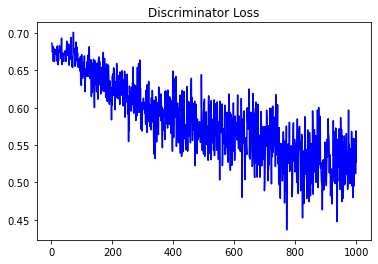

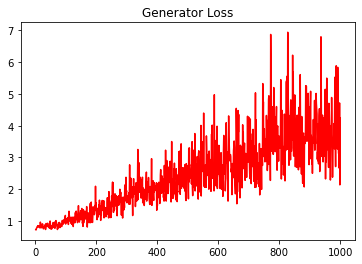

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.21360764902194634


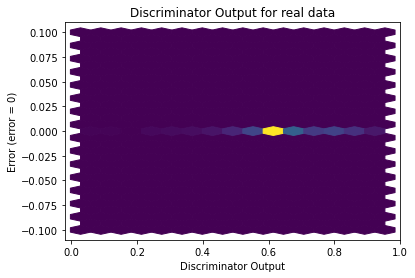

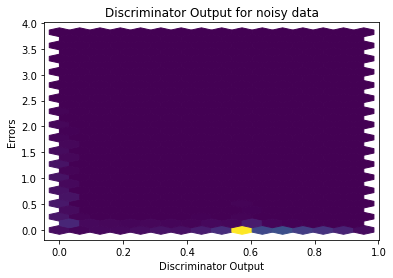

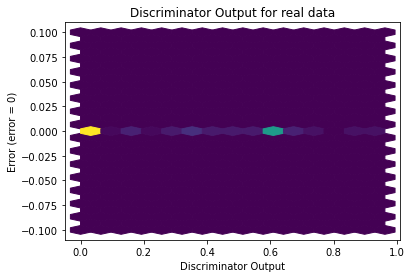

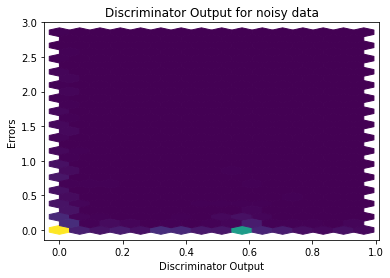

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())